In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-analysis-uk/data.csv


In [2]:
# Load the CSV file into a pandas DataFrame with 'ISO-8859-1' encoding
df = pd.read_csv('/kaggle/input/e-commerce-analysis-uk/data.csv', encoding='ISO-8859-1')

# Display the first few rows of the DataFrame
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicate_rows = df.duplicated().sum()

missing_values, duplicate_rows


(InvoiceNo           0
 StockCode           0
 Description      1454
 Quantity            0
 InvoiceDate         0
 UnitPrice           0
 CustomerID     135080
 Country             0
 dtype: int64,
 5268)

In [4]:
# Check for negative values in 'Quantity' and 'UnitPrice'
negative_quantity = df[df['Quantity'] < 0].shape[0]
negative_unit_price = df[df['UnitPrice'] < 0].shape[0]

negative_quantity, negative_unit_price


(10624, 2)

In [5]:
# Display rows with negative quantities
negative_quantity_rows = df[df['Quantity'] < 0].head()

# Display rows with negative unit prices
negative_unit_price_rows = df[df['UnitPrice'] < 0]

negative_quantity_rows, negative_unit_price_rows


(    InvoiceNo StockCode                       Description  Quantity  \
 141   C536379         D                          Discount        -1   
 154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
 235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
 236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
 237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
 
          InvoiceDate  UnitPrice  CustomerID         Country  
 141   12/1/2010 9:41      27.50     14527.0  United Kingdom  
 154   12/1/2010 9:49       4.65     15311.0  United Kingdom  
 235  12/1/2010 10:24       1.65     17548.0  United Kingdom  
 236  12/1/2010 10:24       0.29     17548.0  United Kingdom  
 237  12/1/2010 10:24       0.29     17548.0  United Kingdom  ,
        InvoiceNo StockCode      Description  Quantity      InvoiceDate  \
 299983   A563186         B  Adjust bad debt         1  8/12/2011 14:51   
 299984   A563187         B  Adjust b

In [6]:
# Fill missing values
df['Description'].fillna('Unknown', inplace=True)
df['CustomerID'].fillna(-1, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check the DataFrame again
df.isnull().sum(), df.duplicated().sum()


(InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64,
 0)

In [7]:
# Get the top 10 most popular products based on quantity sold
top_products = df.groupby('Description').agg({'Quantity': 'sum'}).sort_values('Quantity', ascending=False).head(10)

top_products


,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
JUMBO BAG RED RETROSPOT,47260
POPCORN HOLDER,36322
ASSORTED COLOUR BIRD ORNAMENT,36282
PACK OF 72 RETROSPOT CAKE CASES,36016
WHITE HANGING HEART T-LIGHT HOLDER,35298
RABBIT NIGHT LIGHT,30631
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26299


In [8]:
# Compute total sales for each country
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
sales_by_country = df.groupby('Country').agg({'TotalSales': 'sum'}).sort_values('TotalSales', ascending=False)

sales_by_country


,TotalSales
Country,
United Kingdom,8167128.184
Netherlands,284661.540
EIRE,262993.380
Germany,221509.470
France,197317.110
Australia,137009.770
Switzerland,56363.050
Spain,54756.030
Belgium,40910.960


In [9]:
# Compute the average order value
average_order_value = df.groupby('InvoiceNo').agg({'TotalSales': 'sum'}).mean()[0]

average_order_value


375.521504015444

In [10]:
# Compute the average quantity per transaction
average_quantity_per_transaction = df.groupby('InvoiceNo').agg({'Quantity': 'sum'}).mean()[0]

average_quantity_per_transaction


199.32440154440155

In [11]:
from itertools import combinations
from collections import Counter

# Filter for transactions with more than one product
multi_product_invoices = df[df.duplicated('InvoiceNo', keep=False)]

# Group the data by invoice and create a list of products for each invoice
products_per_invoice = multi_product_invoices.groupby('InvoiceNo')['Description'].apply(list)

# Generate pairs of products for each invoice and count the frequency of each pair
product_pairs = Counter()

for products in products_per_invoice:
    product_pairs.update(Counter(combinations(products, 2)))

# Get the 10 most common product pairs
product_pairs.most_common(10)


[(('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 543),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  493),
 (('JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG RED RETROSPOT'), 466),
 (('JUMBO BAG RED RETROSPOT', 'DOTCOM POSTAGE'), 461),
 (('JUMBO STORAGE BAG SUKI', 'JUMBO BAG RED RETROSPOT'), 456),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.'), 430),
 (('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 402),
 (('JUMBO BAG RED RETROSPOT', 'JUMBO  BAG BAROQUE BLACK WHITE'), 395),
 (('JUMBO BAG APPLES', 'JUMBO BAG RED RETROSPOT'), 391),
 (('WOODLAND CHARLOTTE BAG', 'RED RETROSPOT CHARLOTTE BAG'), 382)]

In [12]:
# Compute total sales for each customer in each country
sales_per_customer = df.groupby(['Country', 'CustomerID']).agg({'TotalSales': 'sum'})

# Compute the average sales per customer for each country
average_sales_per_customer = sales_per_customer.groupby('Country').mean()

# Sort by average sales
average_sales_per_customer = average_sales_per_customer.sort_values('TotalSales', ascending=False)

average_sales_per_customer


,TotalSales
Country,
EIRE,65748.345000
Netherlands,31629.060000
Australia,15223.307778
Hong Kong,9908.240000
Singapore,9120.390000
Sweden,4573.176250
Japan,4417.577500
Iceland,4310.000000
Norway,3516.346000


In [13]:
# Compute total sales and number of invoices for each customer
customer_data = df.groupby('CustomerID').agg({'TotalSales': 'sum', 'InvoiceNo': 'nunique'})

# Compute the median total sales and number of invoices
median_sales = customer_data['TotalSales'].median()
median_invoices = customer_data['InvoiceNo'].median()

# Define a function to assign each customer to a segment
def assign_segment(row):
    if row['TotalSales'] >= median_sales and row['InvoiceNo'] >= median_invoices:
        return 'High Value - Frequent'
    elif row['TotalSales'] >= median_sales and row['InvoiceNo'] < median_invoices:
        return 'High Value - Infrequent'
    elif row['TotalSales'] < median_sales and row['InvoiceNo'] >= median_invoices:
        return 'Low Value - Frequent'
    else:
        return 'Low Value - Infrequent'

# Assign each customer to a segment
customer_data['Segment'] = customer_data.apply(assign_segment, axis=1)

# Count the number of customers in each segment
customer_segments = customer_data['Segment'].value_counts()

customer_segments


High Value - Frequent      1842
Low Value - Infrequent     1785
Low Value - Frequent        401
High Value - Infrequent     345
Name: Segment, dtype: int64

In [14]:
# Add the customer segment to the main DataFrame
df = df.merge(customer_data['Segment'], how='left', left_on='CustomerID', right_index=True)

# For each segment, get the top 5 products based on quantity
top_products_by_segment = df.groupby(['Segment', 'Description']).agg({'Quantity': 'sum'})
top_products_by_segment = top_products_by_segment['Quantity'].groupby(level=0, group_keys=False)
top_products_by_segment = top_products_by_segment.nlargest(5)

top_products_by_segment


Segment                  Description                        
High Value - Frequent    WORLD WAR 2 GLIDERS ASSTD DESIGNS      46019
                         JUMBO BAG RED RETROSPOT                42861
                         POPCORN HOLDER                         34855
                         PACK OF 72 RETROSPOT CAKE CASES        32427
                         ASSORTED COLOUR BIRD ORNAMENT          32387
High Value - Infrequent  WORLD WAR 2 GLIDERS ASSTD DESIGNS       4752
                         SMALL POPCORN HOLDER                    4413
                         JUMBO BAG RED RETROSPOT                 2669
                         RED  HARMONICA IN BOX                   2552
                         BROCADE RING PURSE                      2386
Low Value - Frequent     ESSENTIAL BALM 3.5g TIN IN ENVELOPE     5611
                         BROCADE RING PURSE                      1877
                         POPART WOODEN PENCILS ASST              1500
                         ASSO

In [15]:
# Drop the 'Segment' column from 'df' if it exists
if 'Segment' in df.columns:
    df = df.drop(columns='Segment')

# Add the 'Segment' column to the original DataFrame
df = df.merge(customer_data['Segment'], how='left', left_on='CustomerID', right_index=True)

# Filter data for High Value - Frequent and High Value - Infrequent customers
high_value_frequent_data = df[df['Segment'] == 'High Value - Frequent']
high_value_infrequent_data = df[df['Segment'] == 'High Value - Infrequent']

# Get top 5 products for High Value - Frequent customers
top_products_high_value_frequent = high_value_frequent_data['Description'].value_counts().head(5)

# Get top 5 products for High Value - Infrequent customers
top_products_high_value_infrequent = high_value_infrequent_data['Description'].value_counts().head(5)

top_products_high_value_frequent, top_products_high_value_infrequent


(WHITE HANGING HEART T-LIGHT HOLDER    1966
 JUMBO BAG RED RETROSPOT               1962
 REGENCY CAKESTAND 3 TIER              1853
 LUNCH BAG RED RETROSPOT               1514
 PARTY BUNTING                         1468
 Name: Description, dtype: int64,
 REGENCY CAKESTAND 3 TIER             77
 SET OF 3 CAKE TINS PANTRY DESIGN     71
 JAM MAKING SET WITH JARS             70
 POSTAGE                              63
 BAKING SET 9 PIECE RETROSPOT         60
 Name: Description, dtype: int64)

In [16]:
# Get the number of High Value - Frequent customers in each country
country_distribution_high_value_frequent = high_value_frequent_data.groupby('Country')['CustomerID'].nunique()

# Get the number of High Value - Infrequent customers in each country
country_distribution_high_value_infrequent = high_value_infrequent_data.groupby('Country')['CustomerID'].nunique()

country_distribution_high_value_frequent, country_distribution_high_value_infrequent


(Country
 Australia                6
 Austria                  4
 Bahrain                  1
 Belgium                 16
 Canada                   1
 Channel Islands          6
 Cyprus                   4
 Czech Republic           1
 Denmark                  4
 EIRE                     4
 European Community       1
 Finland                  4
 France                  45
 Germany                 49
 Greece                   1
 Hong Kong                1
 Iceland                  1
 Israel                   1
 Italy                    5
 Japan                    4
 Lithuania                1
 Malta                    1
 Netherlands              4
 Norway                   5
 Poland                   2
 Portugal                 6
 Singapore                1
 Spain                   14
 Sweden                   4
 Switzerland             10
 United Kingdom        1649
 Unspecified              1
 Name: CustomerID, dtype: int64,
 Country
 Australia                 1
 Austria                

In [17]:
# Calculate statistics for the number of invoices for High Value - Infrequent customers
invoice_stats_high_value_infrequent = high_value_infrequent_data.groupby('CustomerID')['InvoiceNo'].nunique().describe()

invoice_stats_high_value_infrequent


count    345.000000
mean       1.649275
std        0.477890
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: InvoiceNo, dtype: float64

In [18]:
# Define product categories to look for
product_categories = ['BAG', 'BOX', 'GLASS', 'VINTAGE', 'HEART', 'CHRISTMAS', 'CAKE', 'CANDLE', 'HOLDER', 'FLOWER']

# Initialize a dictionary to hold the counts for each category
category_counts = {category: 0 for category in product_categories}

# Count the number of products in each category
for category in product_categories:
    category_counts[category] = high_value_infrequent_data['Description'].str.contains(category).sum()

category_counts


{'BAG': 1328,
 'BOX': 947,
 'GLASS': 389,
 'VINTAGE': 1400,
 'HEART': 1505,
 'CHRISTMAS': 1122,
 'CAKE': 1032,
 'CANDLE': 412,
 'HOLDER': 516,
 'FLOWER': 235}

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


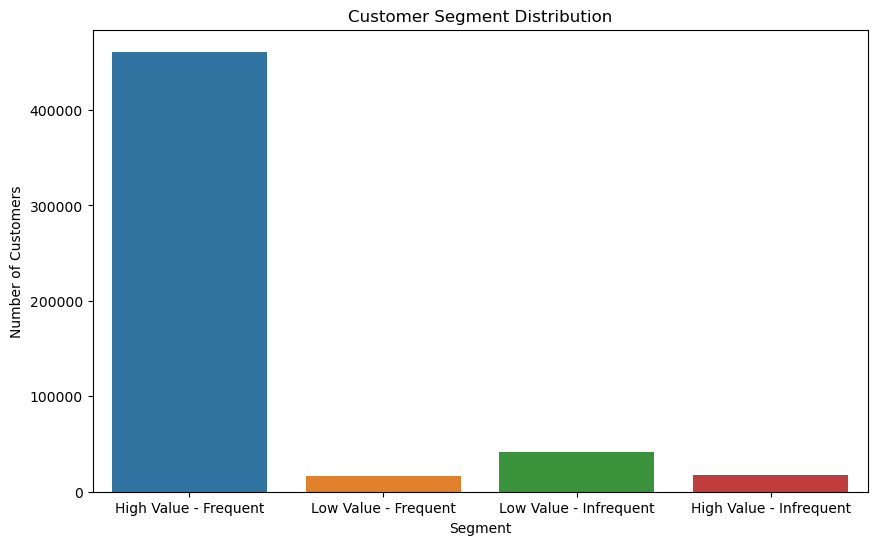

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of customer segments
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Segment')
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()


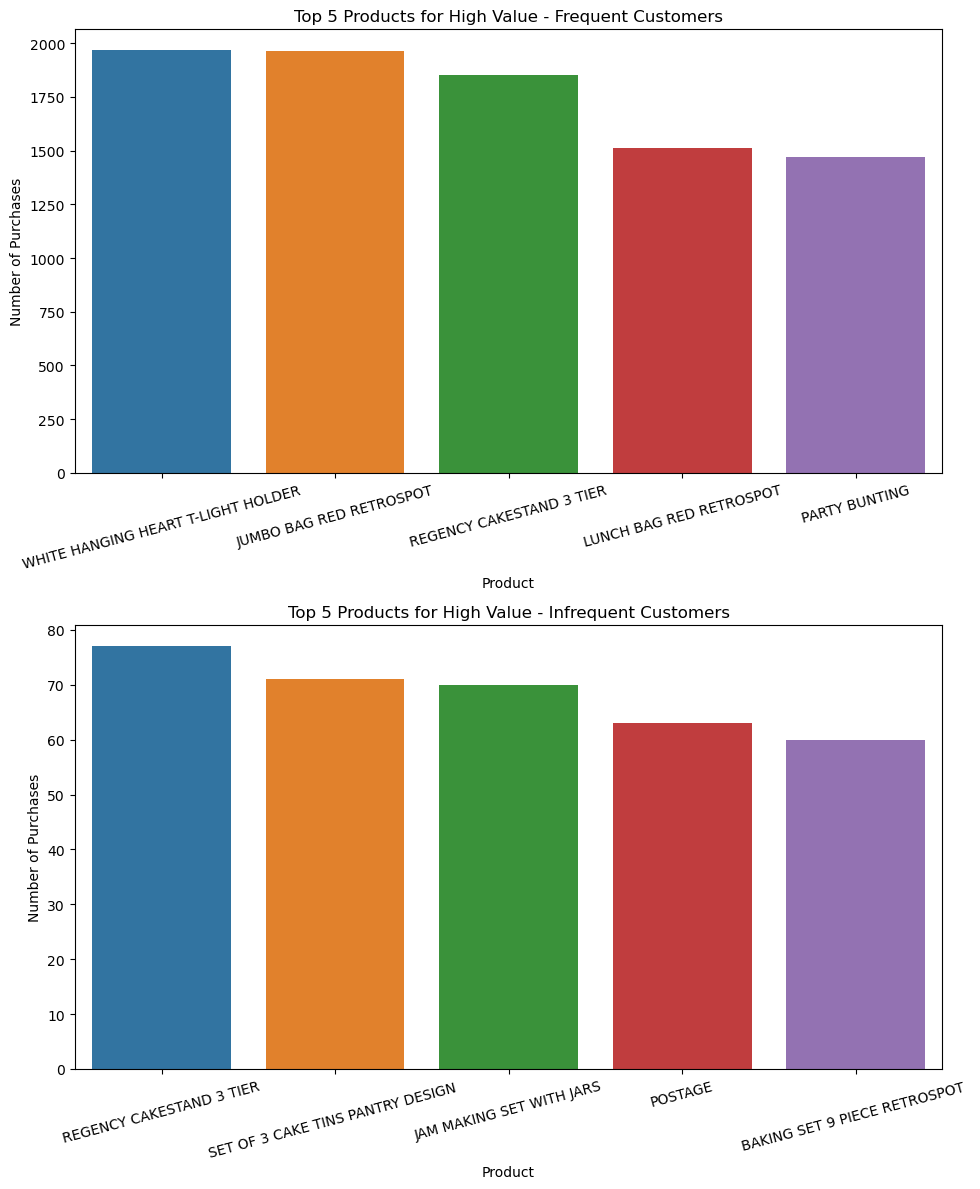

In [20]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot the top 5 products for High Value - Frequent customers
sns.barplot(ax=axs[0], x=top_products_high_value_frequent.index, y=top_products_high_value_frequent.values)
axs[0].set_title('Top 5 Products for High Value - Frequent Customers')
axs[0].set_xlabel('Product')
axs[0].set_ylabel('Number of Purchases')
axs[0].tick_params(axis='x', rotation=15)

# Plot the top 5 products for High Value - Infrequent customers
sns.barplot(ax=axs[1], x=top_products_high_value_infrequent.index, y=top_products_high_value_infrequent.values)
axs[1].set_title('Top 5 Products for High Value - Infrequent Customers')
axs[1].set_xlabel('Product')
axs[1].set_ylabel('Number of Purchases')
axs[1].tick_params(axis='x', rotation=15)

# Adjust the layout
plt.tight_layout()
plt.show()


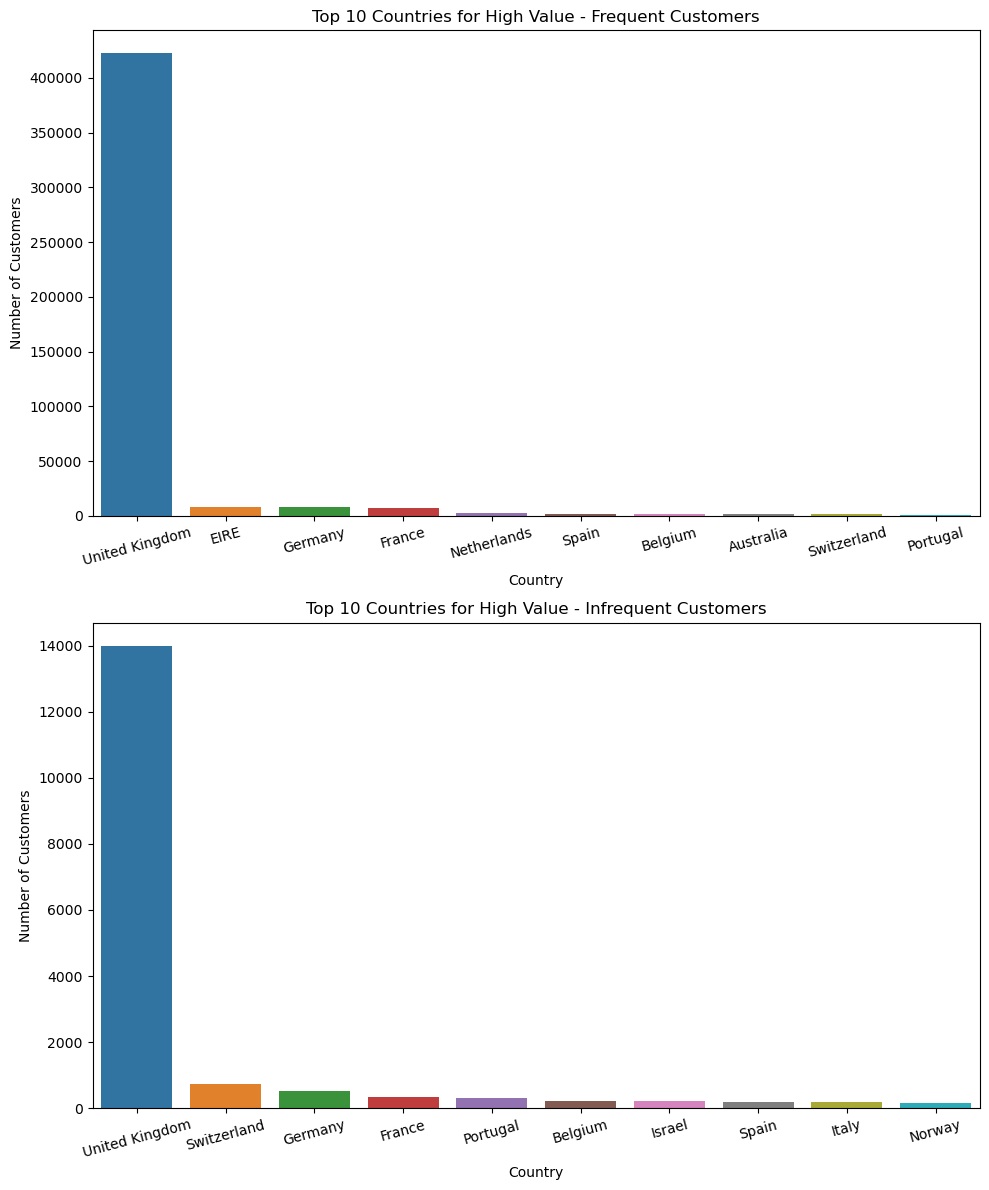

In [21]:
# Get the top 10 countries for High Value - Frequent customers
top_countries_high_value_frequent = high_value_frequent_data['Country'].value_counts().head(10)

# Get the top 10 countries for High Value - Infrequent customers
top_countries_high_value_infrequent = high_value_infrequent_data['Country'].value_counts().head(10)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot the top 10 countries for High Value - Frequent customers
sns.barplot(ax=axs[0], x=top_countries_high_value_frequent.index, y=top_countries_high_value_frequent.values)
axs[0].set_title('Top 10 Countries for High Value - Frequent Customers')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Number of Customers')
axs[0].tick_params(axis='x', rotation=15)

# Plot the top 10 countries for High Value - Infrequent customers
sns.barplot(ax=axs[1], x=top_countries_high_value_infrequent.index, y=top_countries_high_value_infrequent.values)
axs[1].set_title('Top 10 Countries for High Value - Infrequent Customers')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Number of Customers')
axs[1].tick_params(axis='x', rotation=15)

# Adjust the layout
plt.tight_layout()
plt.show()


In [22]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a column for the invoice month
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Calculate monthly sales for each segment
monthly_sales = df.groupby(['Segment', 'InvoiceMonth'])['TotalSales'].sum().reset_index()

# Filter data for High Value - Frequent and High Value - Infrequent customers
monthly_sales_high_value_frequent = monthly_sales[monthly_sales['Segment'] == 'High Value - Frequent']
monthly_sales_high_value_infrequent = monthly_sales[monthly_sales['Segment'] == 'High Value - Infrequent']

monthly_sales_high_value_frequent.head(), monthly_sales_high_value_infrequent.head()


(                 Segment InvoiceMonth  TotalSales
 0  High Value - Frequent      2010-12  686075.960
 1  High Value - Frequent      2011-01  509246.910
 2  High Value - Frequent      2011-02  443752.450
 3  High Value - Frequent      2011-03  605426.950
 4  High Value - Frequent      2011-04  432452.531,
                     Segment InvoiceMonth  TotalSales
 13  High Value - Infrequent      2010-12    11617.78
 14  High Value - Infrequent      2011-01    20689.59
 15  High Value - Infrequent      2011-02    16950.79
 16  High Value - Infrequent      2011-03    25352.54
 17  High Value - Infrequent      2011-04    17185.18)

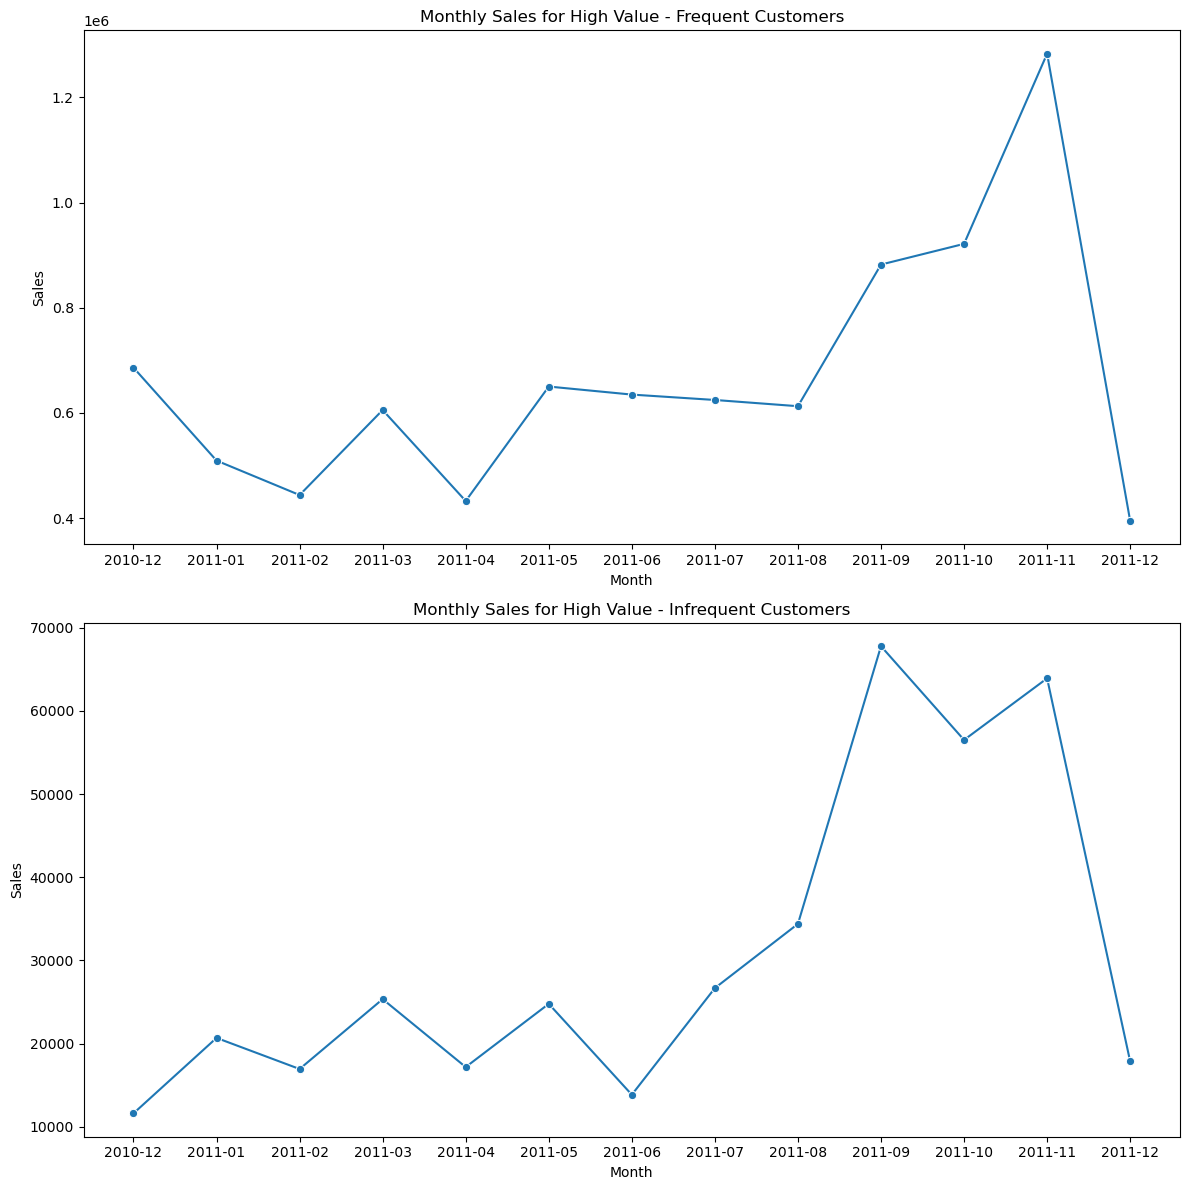

In [23]:
# Convert 'InvoiceMonth' to string format
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].astype(str)

# Filter data for High Value - Frequent and High Value - Infrequent customers
monthly_sales_high_value_frequent = monthly_sales[monthly_sales['Segment'] == 'High Value - Frequent']
monthly_sales_high_value_infrequent = monthly_sales[monthly_sales['Segment'] == 'High Value - Infrequent']

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot monthly sales for High Value - Frequent customers
sns.lineplot(ax=axs[0], data=monthly_sales_high_value_frequent, x='InvoiceMonth', y='TotalSales', marker='o')
axs[0].set_title('Monthly Sales for High Value - Frequent Customers')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Sales')

# Plot monthly sales for High Value - Infrequent customers
sns.lineplot(ax=axs[1], data=monthly_sales_high_value_infrequent, x='InvoiceMonth', y='TotalSales', marker='o')
axs[1].set_title('Monthly Sales for High Value - Infrequent Customers')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Sales')

# Adjust the layout
plt.tight_layout()
plt.show()


/tmp/ipykernel_20/3342439771.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_high_value_frequent['DayOfWeek'] = pd.Categorical(daily_sales_high_value_frequent['DayOfWeek'], categories=order, ordered=True)
/tmp/ipykernel_20/3342439771.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_high_value_infrequent['DayOfWeek'] = pd.Categorical(daily_sales_high_value_infrequent['DayOfWeek'], categories=order, ordered=True)
/tmp/ipykernel_20/3342439771.py:17: SettingWithCopyWarning: 
A v

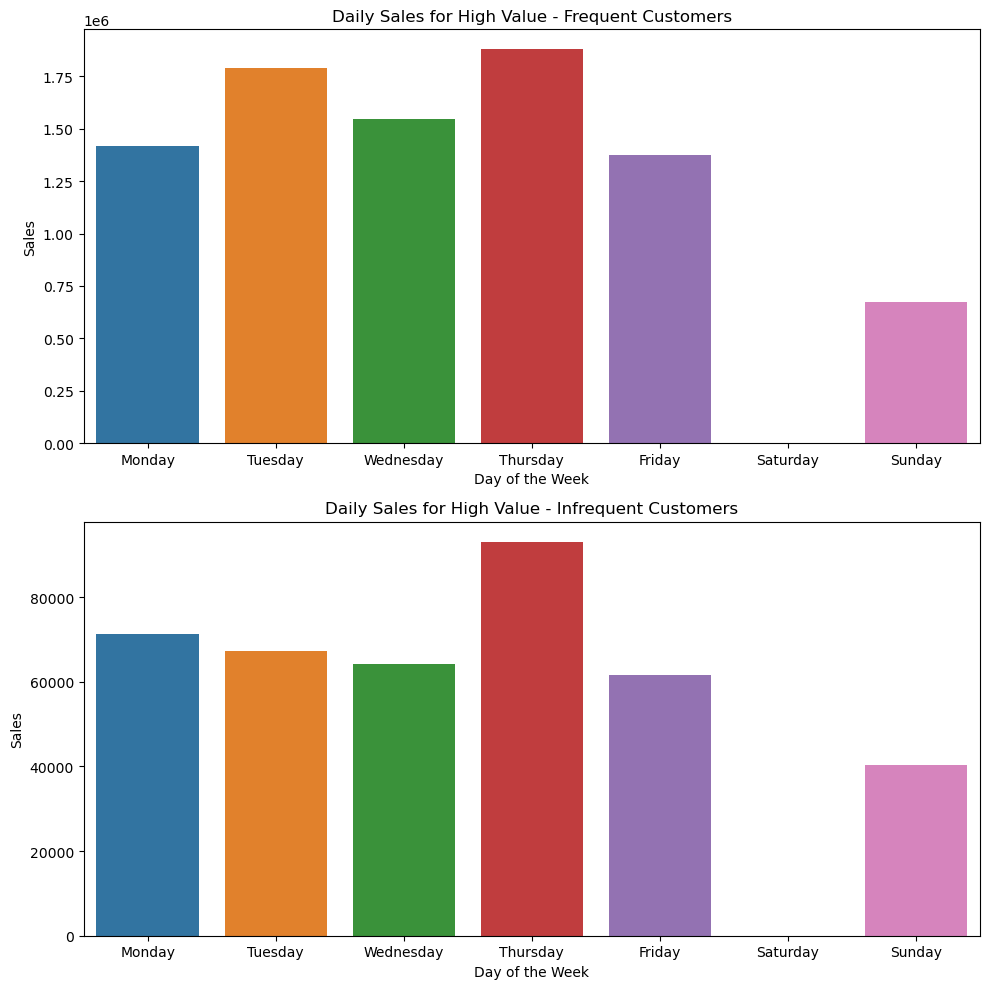

In [24]:
# Create a column for the day of the week
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Calculate sales for each day of the week for each segment
daily_sales = df.groupby(['Segment', 'DayOfWeek'])['TotalSales'].sum().reset_index()

# Filter data for High Value - Frequent and High Value - Infrequent customers
daily_sales_high_value_frequent = daily_sales[daily_sales['Segment'] == 'High Value - Frequent']
daily_sales_high_value_infrequent = daily_sales[daily_sales['Segment'] == 'High Value - Infrequent']

# Order the days of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales_high_value_frequent['DayOfWeek'] = pd.Categorical(daily_sales_high_value_frequent['DayOfWeek'], categories=order, ordered=True)
daily_sales_high_value_infrequent['DayOfWeek'] = pd.Categorical(daily_sales_high_value_infrequent['DayOfWeek'], categories=order, ordered=True)

# Sort by the day of the week
daily_sales_high_value_frequent.sort_values('DayOfWeek', inplace=True)
daily_sales_high_value_infrequent.sort_values('DayOfWeek', inplace=True)

# Plot daily sales for High Value - Frequent and High Value - Infrequent customers
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
sns.barplot(ax=axs[0], data=daily_sales_high_value_frequent, x='DayOfWeek', y='TotalSales')
axs[0].set_title('Daily Sales for High Value - Frequent Customers')
axs[0].set_xlabel('Day of the Week')
axs[0].set_ylabel('Sales')
sns.barplot(ax=axs[1], data=daily_sales_high_value_infrequent, x='DayOfWeek', y='TotalSales')
axs[1].set_title('Daily Sales for High Value - Infrequent Customers')
axs[1].set_xlabel('Day of the Week')
axs[1].set_ylabel('Sales')
plt.tight_layout()
plt.show()


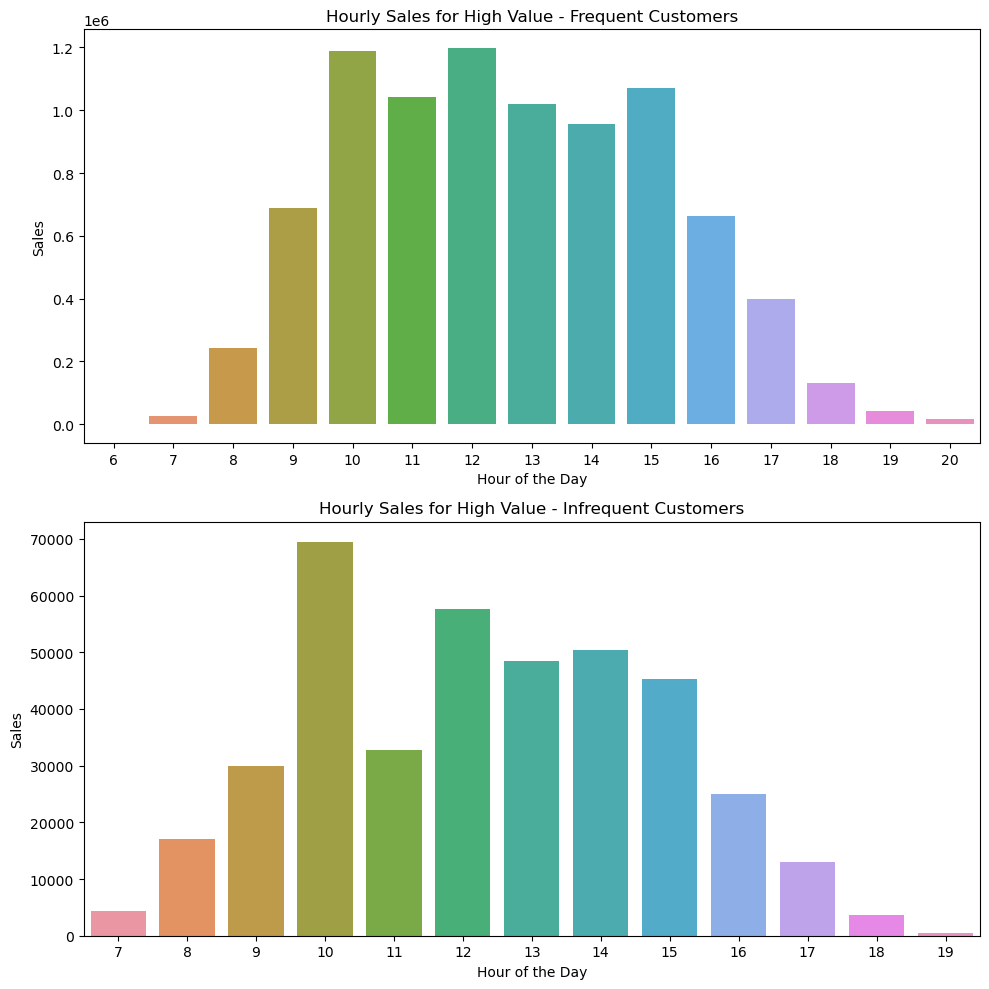

In [25]:
# Create a column for the hour of the day
df['HourOfDay'] = df['InvoiceDate'].dt.hour

# Calculate sales for each hour of the day for each segment
hourly_sales = df.groupby(['Segment', 'HourOfDay'])['TotalSales'].sum().reset_index()

# Filter data for High Value - Frequent and High Value - Infrequent customers
hourly_sales_high_value_frequent = hourly_sales[hourly_sales['Segment'] == 'High Value - Frequent']
hourly_sales_high_value_infrequent = hourly_sales[hourly_sales['Segment'] == 'High Value - Infrequent']

# Plot hourly sales for High Value - Frequent and High Value - Infrequent customers
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
sns.barplot(ax=axs[0], data=hourly_sales_high_value_frequent, x='HourOfDay', y='TotalSales')
axs[0].set_title('Hourly Sales for High Value - Frequent Customers')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Sales')
sns.barplot(ax=axs[1], data=hourly_sales_high_value_infrequent, x='HourOfDay', y='TotalSales')
axs[1].set_title('Hourly Sales for High Value - Infrequent Customers')
axs[1].set_xlabel('Hour of the Day')
axs[1].set_ylabel('Sales')
plt.tight_layout()
plt.show()


In [26]:
# Define product categories to look for
product_categories = ['BAG', 'BOX', 'GLASS', 'VINTAGE', 'HEART', 'CHRISTMAS', 'CAKE', 'CANDLE', 'HOLDER', 'FLOWER']

# Initialize a dictionary to hold the sales for each category
category_sales = {category: 0 for category in product_categories}

# Calculate the total sales for each category
for category in product_categories:
    category_sales[category] = df[df['Description'].str.contains(category)]['TotalSales'].sum()

category_sales


{'BAG': 1094503.38,
 'BOX': 534644.9199999999,
 'GLASS': 251754.37,
 'VINTAGE': 663842.43,
 'HEART': 872926.53,
 'CHRISTMAS': 451063.8499999999,
 'CAKE': 571521.46,
 'CANDLE': 159313.24,
 'HOLDER': 420860.06999999995,
 'FLOWER': 97779.25}

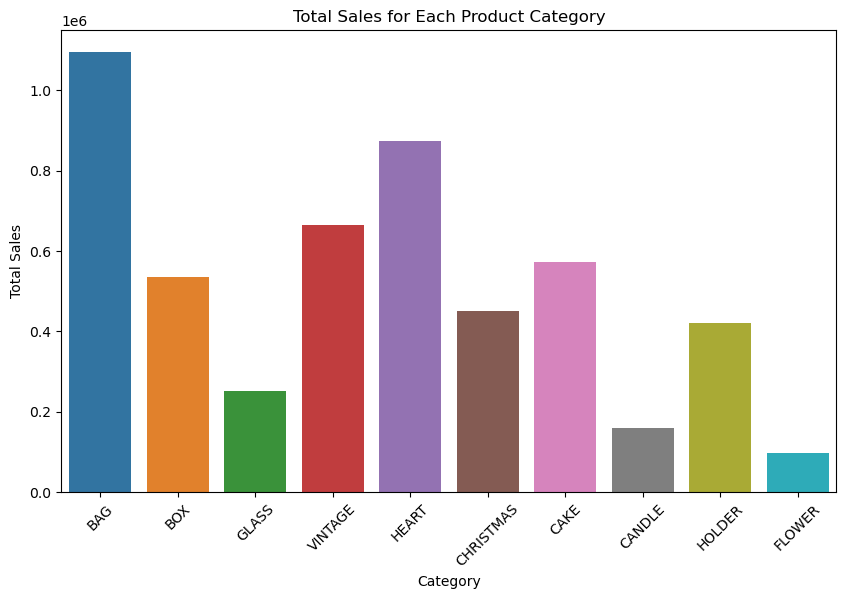

In [27]:
# Convert the dictionary to a DataFrame for plotting
category_sales_df = pd.DataFrame(list(category_sales.items()), columns=['Category', 'TotalSales'])

# Plot the total sales for each category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales_df, x='Category', y='TotalSales')
plt.title('Total Sales for Each Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


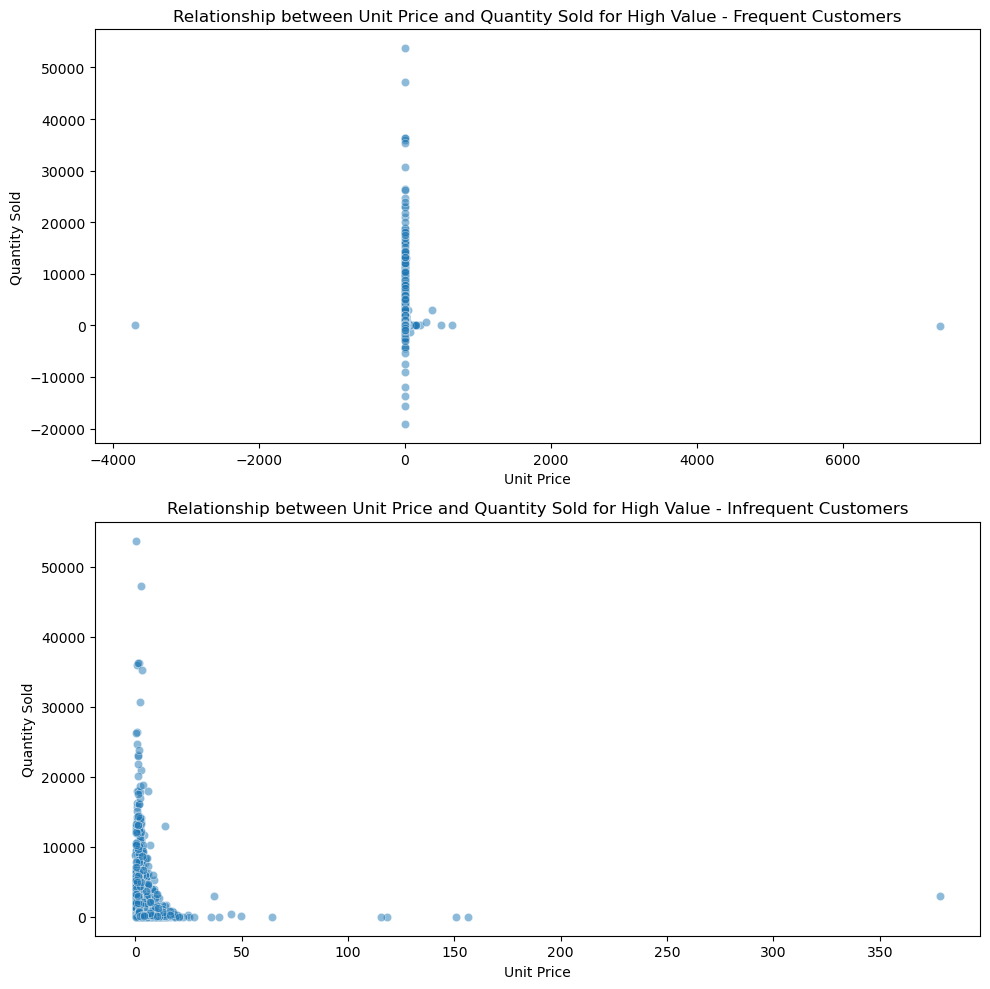

In [28]:
# Calculate the average unit price and total quantity sold for each product
product_data = df.groupby('Description').agg({'UnitPrice': 'mean', 'Quantity': 'sum'}).reset_index()

# Filter data for High Value - Frequent and High Value - Infrequent customers
product_data_high_value_frequent = product_data[product_data['Description'].isin(high_value_frequent_data['Description'].unique())]
product_data_high_value_infrequent = product_data[product_data['Description'].isin(high_value_infrequent_data['Description'].unique())]

# Plot the relationship between unit price and quantity sold for High Value - Frequent and High Value - Infrequent customers
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
sns.scatterplot(ax=axs[0], data=product_data_high_value_frequent, x='UnitPrice', y='Quantity', alpha=0.5)
axs[0].set_title('Relationship between Unit Price and Quantity Sold for High Value - Frequent Customers')
axs[0].set_xlabel('Unit Price')
axs[0].set_ylabel('Quantity Sold')
sns.scatterplot(ax=axs[1], data=product_data_high_value_infrequent, x='UnitPrice', y='Quantity', alpha=0.5)
axs[1].set_title('Relationship between Unit Price and Quantity Sold for High Value - Infrequent Customers')
axs[1].set_xlabel('Unit Price')
axs[1].set_ylabel('Quantity Sold')
plt.tight_layout()
plt.show()


In [29]:
# Calculate the first and last order dates for each customer
customer_order_dates = df.groupby('CustomerID').agg({'InvoiceDate': ['min', 'max']}).reset_index()
customer_order_dates.columns = ['CustomerID', 'FirstOrderDate', 'LastOrderDate']

# Define the cutoff dates for new, loyal, and churned customers
now = df['InvoiceDate'].max()
cutoff_new = now - pd.DateOffset(months=3)
cutoff_churned = now - pd.DateOffset(months=12)

# Categorize customers into new, loyal, and churned
customer_order_dates['Segment'] = 'Loyal'
customer_order_dates.loc[customer_order_dates['FirstOrderDate'] > cutoff_new, 'Segment'] = 'New'
customer_order_dates.loc[customer_order_dates['LastOrderDate'] < cutoff_churned, 'Segment'] = 'Churned'

# Calculate the total sales for each customer
customer_sales = df.groupby('CustomerID')['TotalSales'].sum().reset_index()

# Merge the order dates and sales data
customer_data = pd.merge(customer_order_dates, customer_sales, on='CustomerID')

# Examine the number of customers and total sales in each segment
customer_counts = customer_data['Segment'].value_counts()
customer_sales = customer_data.groupby('Segment')['TotalSales'].sum()

customer_counts, customer_sales


(Loyal      3341
 New         965
 Churned      67
 Name: Segment, dtype: int64,
 Segment
 Churned      14788.900
 Loyal      9136003.653
 New         575214.401
 Name: TotalSales, dtype: float64)

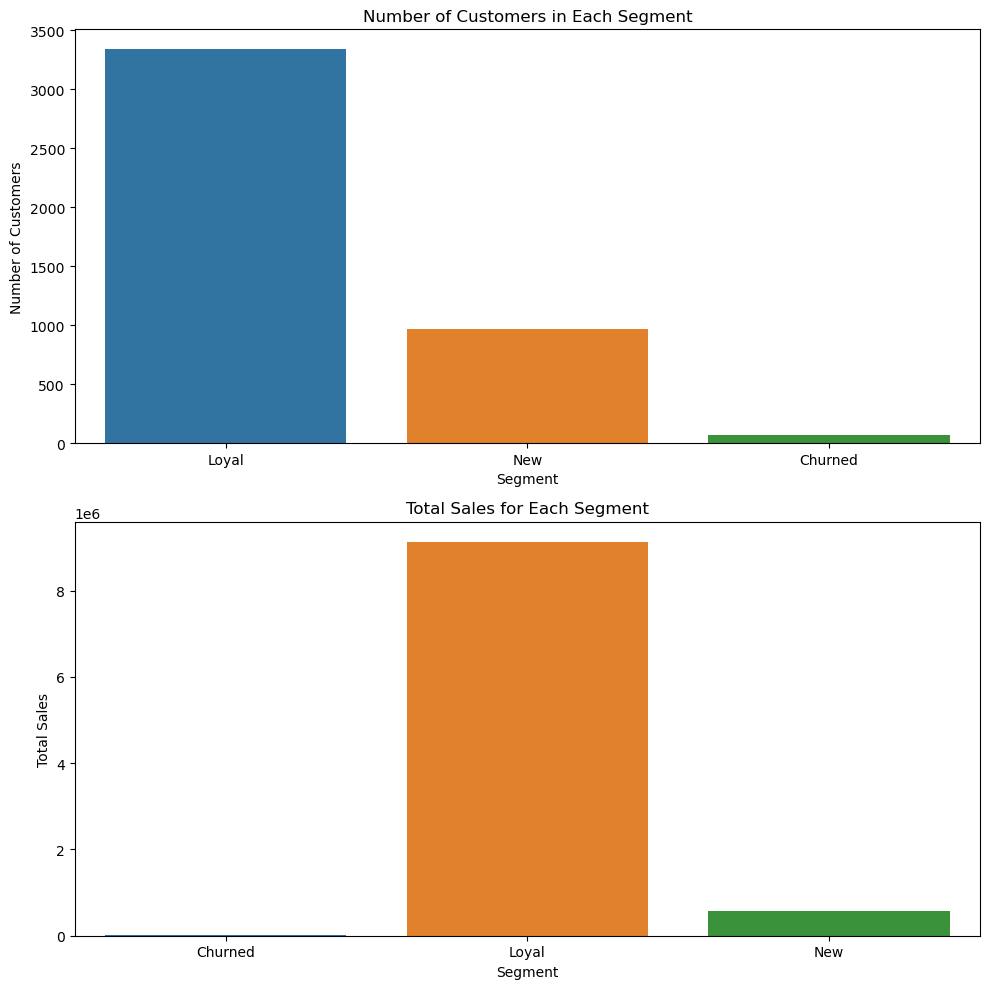

In [30]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the number of customers in each segment
sns.barplot(ax=axs[0], x=customer_counts.index, y=customer_counts.values)
axs[0].set_title('Number of Customers in Each Segment')
axs[0].set_xlabel('Segment')
axs[0].set_ylabel('Number of Customers')

# Plot the total sales for each segment
sns.barplot(ax=axs[1], x=customer_sales.index, y=customer_sales.values)
axs[1].set_title('Total Sales for Each Segment')
axs[1].set_xlabel('Segment')
axs[1].set_ylabel('Total Sales')

# Adjust the layout
plt.tight_layout()
plt.show()


In [31]:
# Calculate the total number of products and orders for each customer
customer_products = df.groupby('CustomerID').agg({'StockCode': 'count', 'InvoiceNo': 'nunique'}).reset_index()
customer_products.columns = ['CustomerID', 'TotalProducts', 'TotalOrders']

# Calculate the average number of products per order for each customer
customer_products['AvgProductsPerOrder'] = customer_products['TotalProducts'] / customer_products['TotalOrders']

# Define the cutoff values for low, medium, and high average number of products per order
cutoff_low = customer_products['AvgProductsPerOrder'].quantile(0.33)
cutoff_high = customer_products['AvgProductsPerOrder'].quantile(0.67)

# Categorize customers into low, medium, and high average number of products per order
customer_products['ProductCategory'] = 'Medium'
customer_products.loc[customer_products['AvgProductsPerOrder'] <= cutoff_low, 'ProductCategory'] = 'Low'
customer_products.loc[customer_products['AvgProductsPerOrder'] > cutoff_high, 'ProductCategory'] = 'High'

# Merge the customer data with the original DataFrame
df = df.merge(customer_products[['CustomerID', 'ProductCategory']], on='CustomerID', how='left')

# Calculate the total sales for each product category
product_category_sales = df.groupby('ProductCategory')['TotalSales'].sum()

# Examine the number of customers and total sales in each product category
customer_counts = customer_products['ProductCategory'].value_counts()

customer_counts, product_category_sales


(Medium    1489
 Low       1475
 High      1409
 Name: ProductCategory, dtype: int64,
 ProductCategory
 High      4598214.961
 Low       2625378.552
 Medium    2502413.441
 Name: TotalSales, dtype: float64)

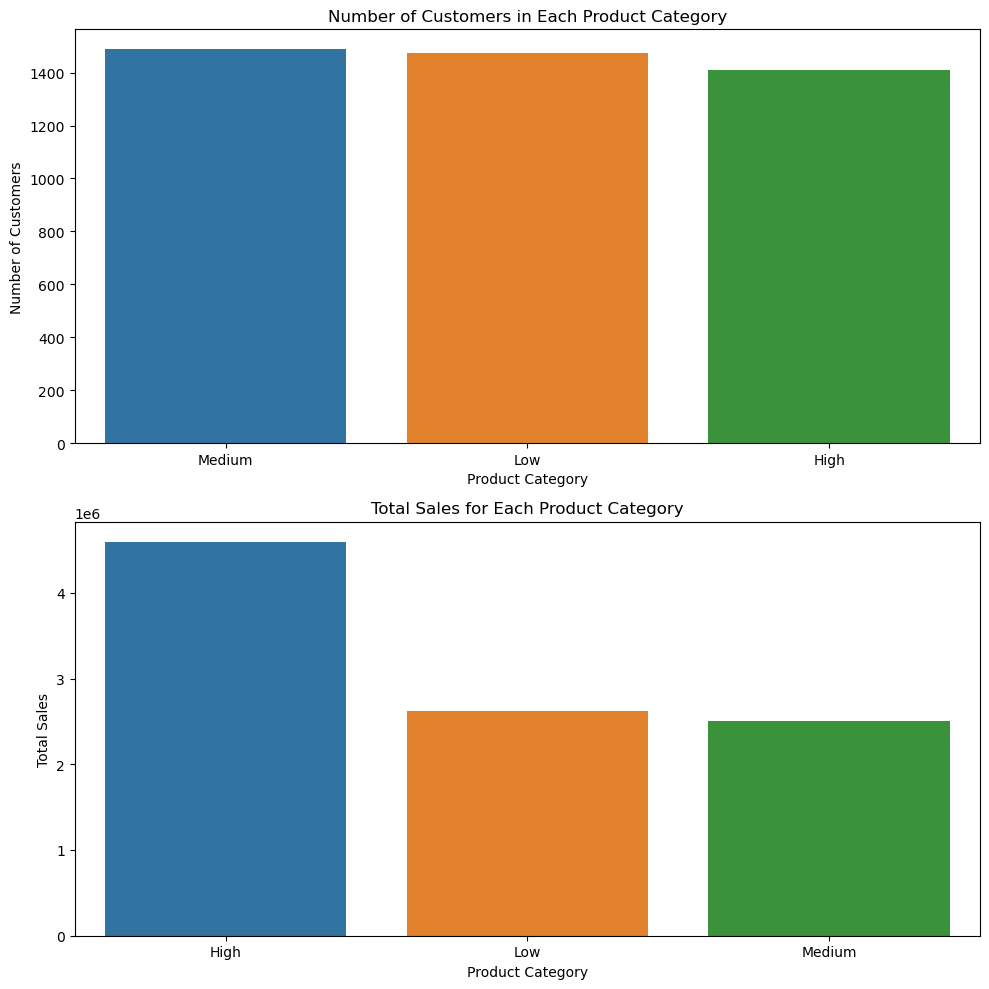

In [32]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the number of customers in each product category
sns.barplot(ax=axs[0], x=customer_counts.index, y=customer_counts.values)
axs[0].set_title('Number of Customers in Each Product Category')
axs[0].set_xlabel('Product Category')
axs[0].set_ylabel('Number of Customers')

# Plot the total sales for each product category
sns.barplot(ax=axs[1], x=product_category_sales.index, y=product_category_sales.values)
axs[1].set_title('Total Sales for Each Product Category')
axs[1].set_xlabel('Product Category')
axs[1].set_ylabel('Total Sales')

# Adjust the layout
plt.tight_layout()
plt.show()


In [33]:
# Calculate the number of unique products bought by each customer
customer_unique_products = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
customer_unique_products.columns = ['CustomerID', 'UniqueProducts']

# Define the cutoff values for low, medium, and high number of unique products
cutoff_low = customer_unique_products['UniqueProducts'].quantile(0.33)
cutoff_high = customer_unique_products['UniqueProducts'].quantile(0.67)

# Categorize customers into low, medium, and high number of unique products
customer_unique_products['UniqueProductCategory'] = 'Medium'
customer_unique_products.loc[customer_unique_products['UniqueProducts'] <= cutoff_low, 'UniqueProductCategory'] = 'Low'
customer_unique_products.loc[customer_unique_products['UniqueProducts'] > cutoff_high, 'UniqueProductCategory'] = 'High'

# Merge the customer data with the original DataFrame
df = df.merge(customer_unique_products[['CustomerID', 'UniqueProductCategory']], on='CustomerID', how='left')

# Calculate the total sales for each unique product category
unique_product_category_sales = df.groupby('UniqueProductCategory')['TotalSales'].sum()

# Examine the number of customers and total sales in each unique product category
customer_counts = customer_unique_products['UniqueProductCategory'].value_counts()

customer_counts, unique_product_category_sales


(Medium    1482
 Low       1467
 High      1424
 Name: UniqueProductCategory, dtype: int64,
 UniqueProductCategory
 High      7267488.941
 Low        710667.261
 Medium    1747850.752
 Name: TotalSales, dtype: float64)

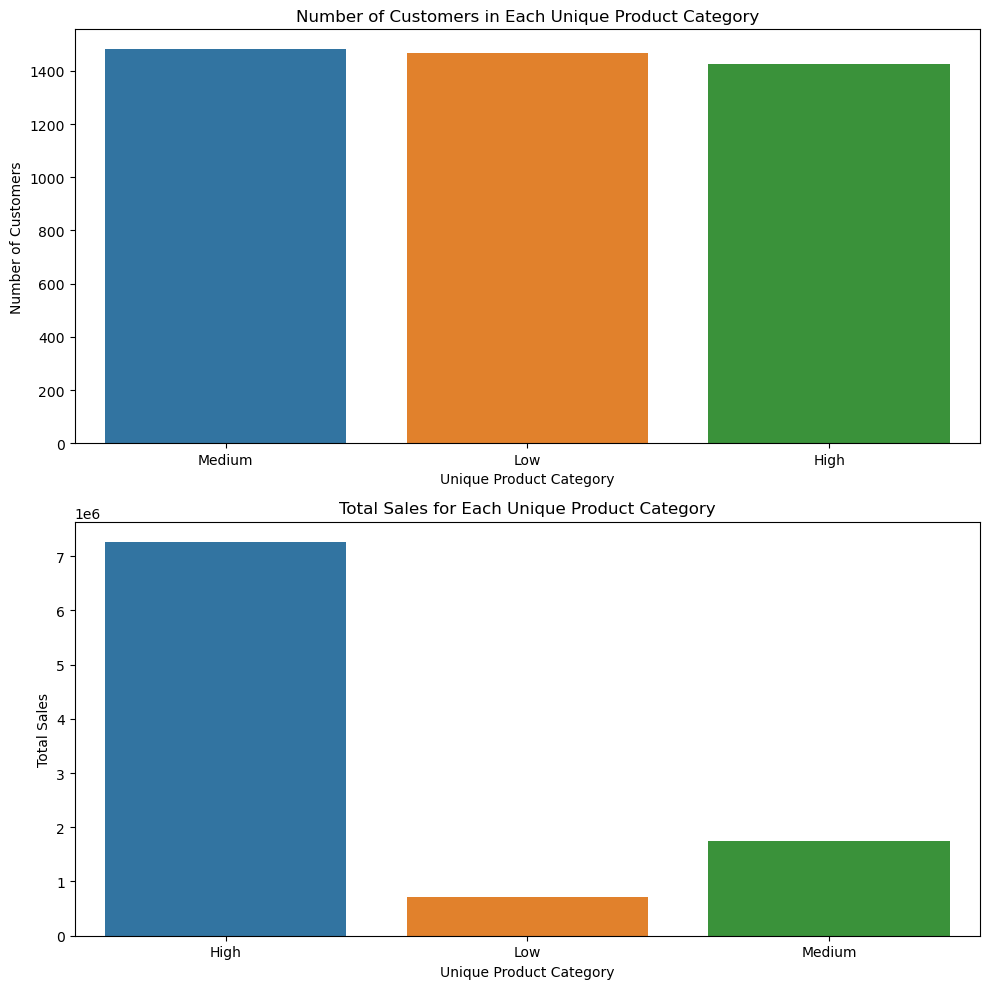

In [34]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the number of customers in each unique product category
sns.barplot(ax=axs[0], x=customer_counts.index, y=customer_counts.values)
axs[0].set_title('Number of Customers in Each Unique Product Category')
axs[0].set_xlabel('Unique Product Category')
axs[0].set_ylabel('Number of Customers')

# Plot the total sales for each unique product category
sns.barplot(ax=axs[1], x=unique_product_category_sales.index, y=unique_product_category_sales.values)
axs[1].set_title('Total Sales for Each Unique Product Category')
axs[1].set_xlabel('Unique Product Category')
axs[1].set_ylabel('Total Sales')

# Adjust the layout
plt.tight_layout()
plt.show()
